In [22]:
from PIL import Image
import numpy as np

from src.predict import predict

In [30]:
image_path = "./resources/live_alone.png"
confidence = 0.3
device = "cpu"

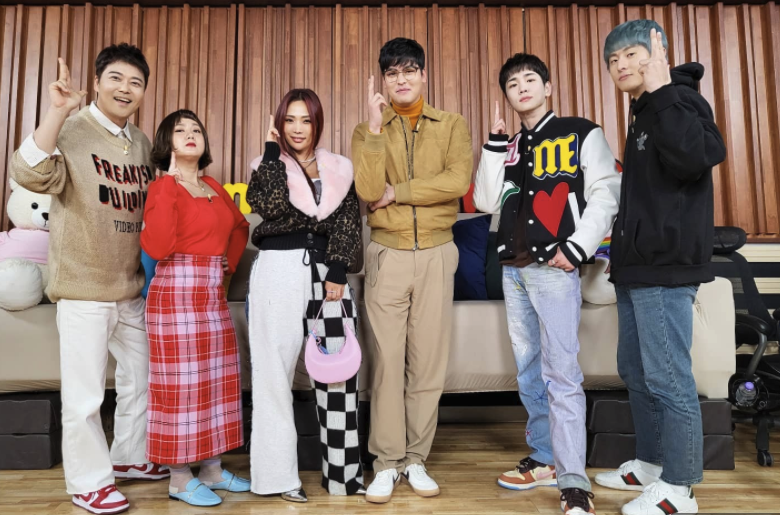

In [5]:
image = Image.open(image_path)
image

### Face Detection

In [17]:
model_path = "./checkpoints/face_yolov8n.pt"
pred = predict(model_path, image, confidence, device)


0: 448x640 6 faces, 186.5ms
Speed: 2.5ms preprocess, 186.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


In [18]:
pred.bboxes

[[99.54458618164062,
  59.51898956298828,
  144.93093872070312,
  115.56489562988281],
 [505.65643310546875,
  65.08952331542969,
  544.4802856445312,
  109.51258850097656],
 [383.9433898925781, 56.9805793762207, 421.42724609375, 101.8218765258789],
 [171.8557586669922,
  115.95271301269531,
  204.29635620117188,
  155.17010498046875],
 [282.5162048339844, 100.2354507446289, 315.5312805175781, 148.7179718017578],
 [608.7256469726562, 38.615821838378906, 650.591064453125, 88.1867904663086]]

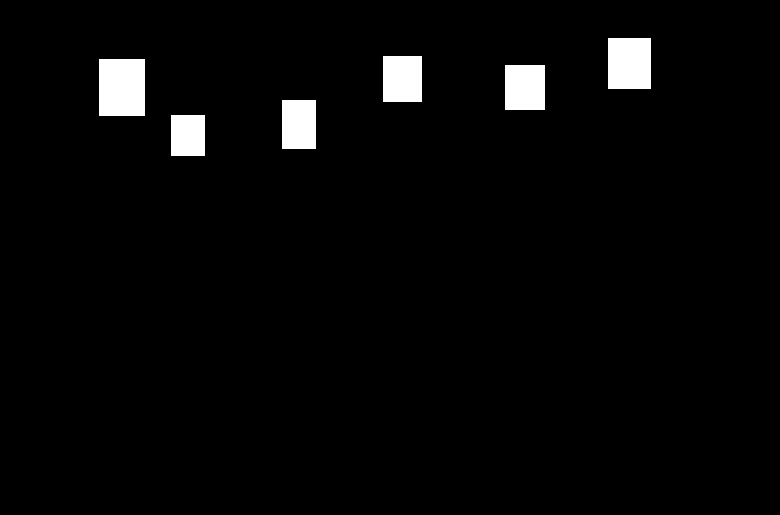

In [23]:
mask_display = np.array(pred.masks[0])
for mask in pred.masks[1:]:
    mask_display = np.maximum(mask_display, mask)
Image.fromarray(mask_display)

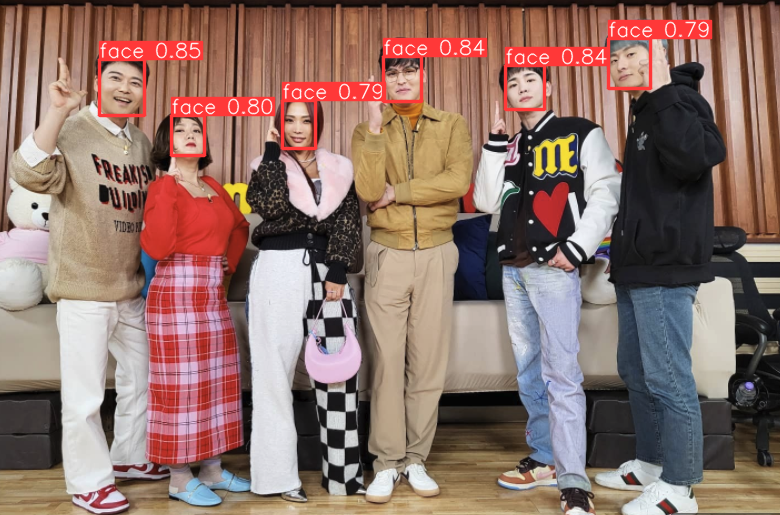

In [20]:
pred.preview

### Hand Detection

In [24]:
model_path = "./checkpoints/hand_yolov8n.pt"
pred = predict(model_path, image, confidence, device)


0: 448x640 4 hands, 183.1ms
Speed: 3.3ms preprocess, 183.1ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


[[543.656494140625, 249.65492248535156, 574.9579467773438, 271.87872314453125],
 [35.0086669921875, 54.99660110473633, 88.52088928222656, 141.40090942382812],
 [39.471656799316406,
  55.121063232421875,
  88.08074951171875,
  118.37442016601562],
 [371.70587158203125,
  180.44041442871094,
  396.7975158691406,
  210.26516723632812]]

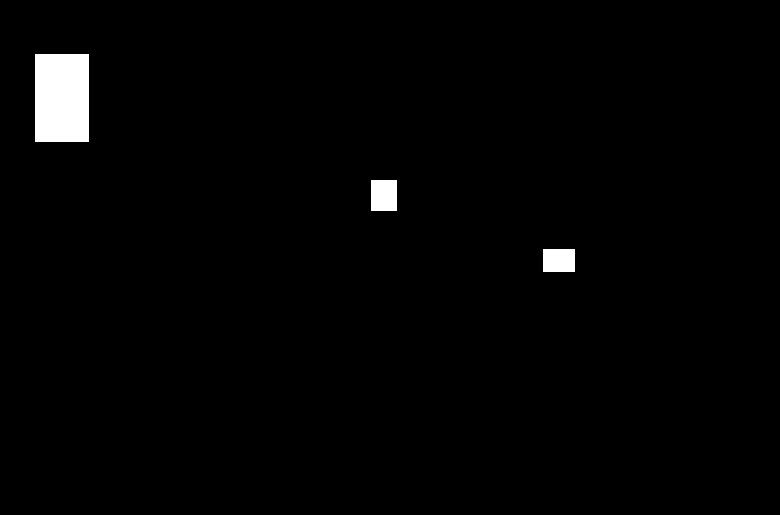

In [25]:
display(pred.bboxes)

mask_display = np.array(pred.masks[0])
for mask in pred.masks[1:]:
    mask_display = np.maximum(mask_display, mask)
Image.fromarray(mask_display)

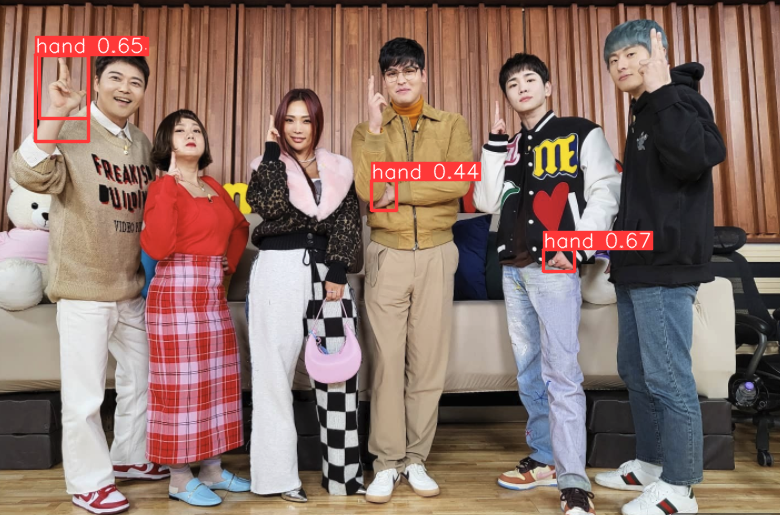

In [26]:
pred.preview

### Person Detection

In [27]:
model_path = "./checkpoints/person_yolov8n-seg.pt"
pred = predict(model_path, image, confidence, device)


0: 448x640 6 persons, 272.7ms
Speed: 3.2ms preprocess, 272.7ms inference, 8.9ms postprocess per image at shape (1, 3, 448, 640)


[[472.425537109375, 50.70726013183594, 621.7637939453125, 509.0694274902344],
 [349.01824951171875,
  35.24354934692383,
  474.00836181640625,
  500.1491394042969],
 [7.732654094696045, 41.273475646972656, 162.0046844482422, 510.6480712890625],
 [600.4797973632812, 16.867122650146484, 728.1846923828125, 509.9490966796875],
 [242.09921264648438, 86.57275390625, 360.2159423828125, 498.8692321777344],
 [139.40518188476562,
  109.45574951171875,
  248.60317993164062,
  505.9237365722656]]

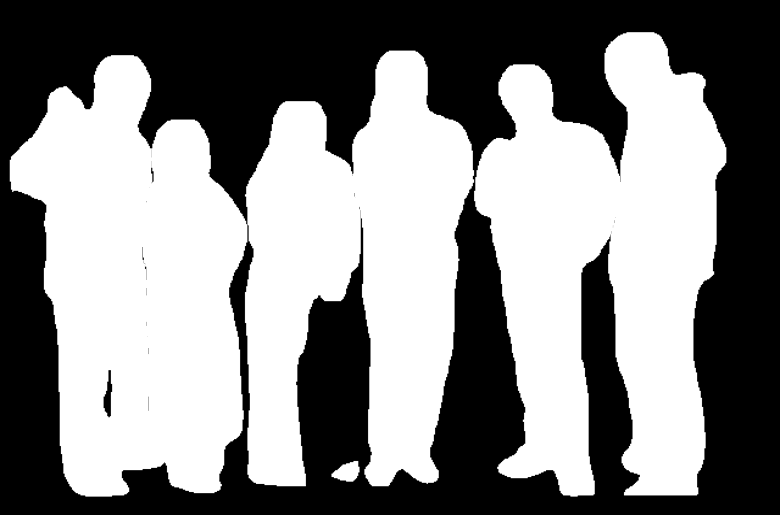

In [28]:
display(pred.bboxes)

mask_display = np.array(pred.masks[0])
for mask in pred.masks[1:]:
    mask_display = np.maximum(mask_display, mask)
Image.fromarray(mask_display)

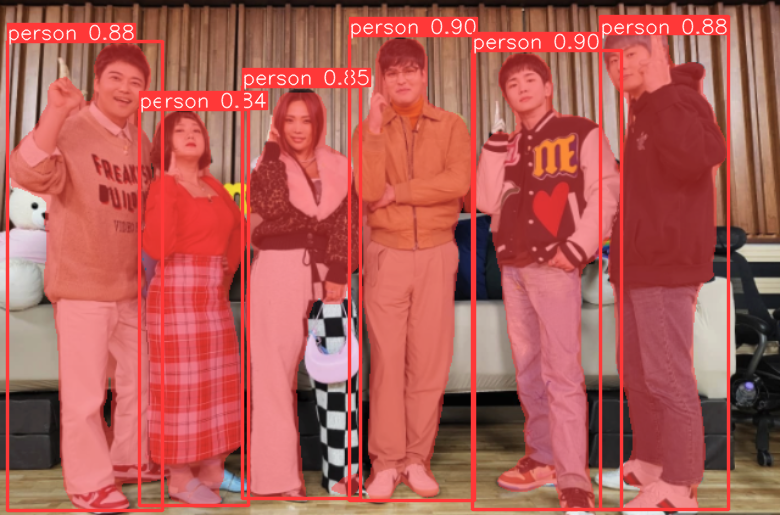

In [29]:
pred.preview